**1.	Image Search Engine Baseline:**

•Image search Engine gives similar images of given image. We use content-based image retrieval concept to build image search engine.

•Content-based image retrieval (CBIR) is a system for retrieving relevant images based on a given image. The system consists of an image query and an image database. It works as below

•	Extract features on all images and query image

•	System will calculate similarities between the query with all images on the database.

•	System will retrieve all the images that have a great similarity with the query


**Search Engine Baseline Model Implementation:**

•	Download the dataset: The images dataset is downloaded from LFW Face Database : Main (umass.edu).

Note: Since the dataset is huge and taking long computation time. We used subset (1508 images from this set 

•	We use convolutional neural network (CNN) for extracting images features for baseline model

•	Insert the query image ( we select image randomly) and extract its features using CNN

•	Calculate the similarities of query image with all images using KNN algorithm. This algorithm calculates distances (Euclidean Distance) between query image features with all images features

•	Retrieve the most similar result:  we get k images that has smaller distances to query image to get similar images.


**Image search Engine baseline model implementation using python (using google colab):**

•	Uploaded images dataset lfw.zip to /content/ 

•	Unzipped lfw.zip to /content/sample_data using below command

!unzip /content/lfw.zip -d /content/sample_data


In [1]:


!unzip /content/lfw.zip -d /content/sample_data


Archive:  /content/lfw.zip
   creating: /content/sample_data/lfw/Aaron_Eckhart/
  inflating: /content/sample_data/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: /content/sample_data/lfw/Aaron_Guiel/
  inflating: /content/sample_data/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: /content/sample_data/lfw/Aaron_Patterson/
  inflating: /content/sample_data/lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: /content/sample_data/lfw/Aaron_Peirsol/
  inflating: /content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: /content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: /content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  inflating: /content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg  
   creating: /content/sample_data/lfw/Aaron_Pena/
  inflating: /content/sample_data/lfw/Aaron_Pena/Aaron_Pena_0001.jpg  
   creating: /content/sample_data/lfw/Aaron_Sorkin/
  inflating: /content/sample_data/lfw/Aaron_Sorki

•	**Create files path list**

In [2]:
import os
path =r'/content/sample_data/lfw'
list_of_files = []
for root, dirs, files in os.walk(path):
	for file in files:
		list_of_files.append(os.path.join(root,file))

len(list_of_files)

1508

**•	Created files path list and respective labels in sorted order**

In [3]:
imgspaths= []
imglabels=[]
for imgpath in sorted(list_of_files):
   imgspaths.append(imgpath)
   temp=imgpath.split("/")
   imglabels.append(temp[len(temp)-2])

print(imgspaths)
print(imglabels)

['/content/sample_data/lfw/AJ_Cook/AJ_Cook_0001.jpg', '/content/sample_data/lfw/AJ_Lamas/AJ_Lamas_0001.jpg', '/content/sample_data/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg', '/content/sample_data/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg', '/content/sample_data/lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg', '/content/sample_data/lfw/Aaron_Pena/Aaron_Pena_0001.jpg', '/content/sample_data/lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg', '/content/sample_data/lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg', '/content/sample_data/lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg', '/content/sample_data/lfw/Abba_Eban/Abba_Eban_0001.jpg', '/content/sample_data/lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg', '/content/sample_data/lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-

**•	Extract features of image: resized image with (224,224) pixels and converted image to color.  Used baseline model using VGG16. Extracted features array from fully connected layer.**

In [4]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

class IMGFeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extractfeatures(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        norm=np.linalg.norm(feature)
        return feature/norm,norm



**•	Below function is to plot similar images:**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def Showsimilarpictures(scores):
  axes=[]
  fig=plt.figure(figsize=(8,8))
  for a in range(len(scores)):
      score = scores[a]
      axes.append(fig.add_subplot(6, 6, a+1))
      subplot_title=str(score[0])
      axes[-1].set_title(subplot_title)  
      plt.axis('off')
      plt.imshow(Image.open(score[1]))
  fig.tight_layout()
  plt.show()

**•	Extract all images features and save in array. It took more than 30 min without GPU**

In [6]:
from PIL import Image
from pathlib import Path
import numpy as np
# Iterate through images 
features =[]
featuresnorms= []
imagepaths= []
fe = IMGFeatureExtractor()
def ExtractAllImagesFeatures(fe):
    for img_path in sorted(list_of_files):
        #print(img_path) 
      feature,featurenorm = fe.extractfeatures(img=Image.open(img_path))
      features.append(feature)
      featuresnorms.append(featurenorm)
            #print(feature,"=============",featurenorm)
      imagepaths.append(img_path)
      #print(img_path)
      #np.save(feature_path, feature)
    feature_path = Path("/content/sample_data/Imagesfeatures.npy") 
    np.save(feature_path, features)
    print(imagepaths)

553476096/553467096 [==============================] - 5s 0us/step


**•	Saved all images features numpy array in npy file for future use. The features file can be used for search, instead of extracting features again. All images features extraction (1508 images) took 806 seconds using without GPU.**

In [7]:
from PIL import ImageFile
import matplotlib.pyplot as plt
import numpy as np
import time
starttime=time.time()
ImageFile.LOAD_TRUNCATED_IMAGES = True
ExtractAllImagesFeatures(fe)
endtime=time.time()
print("All images features extraction time ",round(endtime-starttime)," seconds")
Allimagesfeatures = np.load('/content/sample_data/Imagesfeatures.npy')
#print(Allimagesfeatures)
#print(Allimagesfeatures.shape)

['/content/sample_data/lfw/AJ_Cook/AJ_Cook_0001.jpg', '/content/sample_data/lfw/AJ_Lamas/AJ_Lamas_0001.jpg', '/content/sample_data/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg', '/content/sample_data/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg', '/content/sample_data/lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg', '/content/sample_data/lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg', '/content/sample_data/lfw/Aaron_Pena/Aaron_Pena_0001.jpg', '/content/sample_data/lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg', '/content/sample_data/lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg', '/content/sample_data/lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg', '/content/sample_data/lfw/Abba_Eban/Abba_Eban_0001.jpg', '/content/sample_data/lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg', '/content/sample_data/lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-

•	**Loaded random image and extracted it’s features. It took 2 seconds. Found distance between query image features and all images features. Considered 25 images with shortest distance to query image as similar images( it is using KNN and L2 norm). Finding similar images took 1.57 seconds
Below is code :**


Roh_Moo-hyun


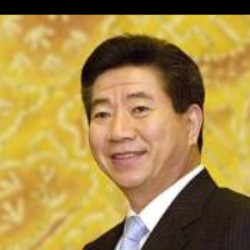

Query Image features extraction time  5  seconds
 Similar Images 


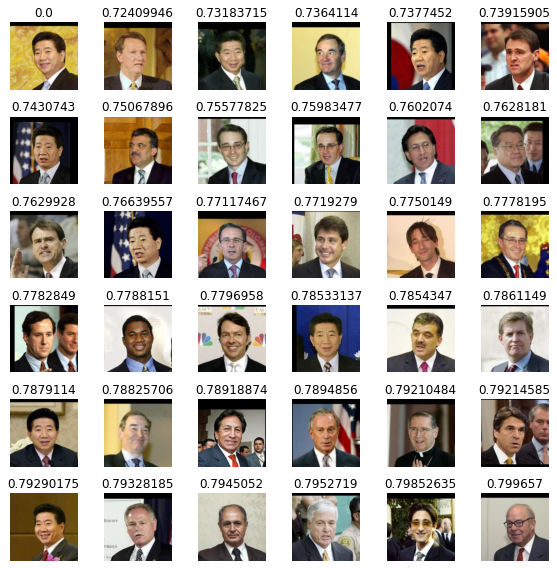

similarity images search time : 2.1530816555023193  seconds


In [8]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
import time
starttime=time.time()
queryImg = IMGFeatureExtractor()
# grab a random query image
query_image_idx = int(len(imgspaths) * random.random())
print(imglabels[query_image_idx])
# let's display the image
img1=Image.open(imgspaths[query_image_idx])
display(img1)
# Extract its features
queryImgFE,imgnorm = queryImg.extractfeatures(img1)
endtime=time.time()
print("Query Image features extraction time ",round(endtime-starttime)," seconds")
starttime=time.time()
# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - queryImgFE, axis=1)
#print(len(dists)," ",len(imgspaths))
print(" Similar Images \n ==============================")
# Extract 36 images that have lowest distance
ids1 = np.argsort(dists)[:36]
#print(ids1)
scores = [(dists[id], imgspaths[id]) for id in ids1]
Showsimilarpictures(scores)
endtime=time.time()
print("similarity images search time :",(endtime-starttime)," seconds")

**	Image search Engine model implementation using Sklearn library NearestNeighbors:**

In [9]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
def  FindNearestNeighbors(k,Allimagesfeatures,queryImgFE,idx):
  starttime=time.time()
  # set desired number of neighbors
  neigh = NearestNeighbors(n_neighbors=k)
  neigh.fit(Allimagesfeatures)
  # select indices of k nearest neighbors of the vectors in the input list
  distances,neighbors = neigh.kneighbors([queryImgFE])
  #print(ids1)
  #scores = [(dists[id], imgspaths[id]) for id in ids1]
  if len(Allimagesfeatures)> len(imgspaths):
       scores = [(distances[0][i],imgspaths[idx[neighbors[0][i]]]) for i in range(neighbors.shape[1])  ]
       #scores = [(distances[0][i],imgspaths[idx[neighbors[0][i]]]) for i in range(neighbors.shape[1])]
  else:  
       scores = [(distances[0][i],imgspaths[neighbors[0][i]]) for i in range(neighbors.shape[1])]

  # Visualize the result
  #print(len(scores))
  print(imglabels[query_image_idx])
  display(img1)
  axes=[]
  fig=plt.figure(figsize=(8,8))
  print(" Similar Images as below \n ==============================")
  for j in range(len(scores)):
    score = scores[j]
    #print(len(scores))
    k=len(scores)
    if k>5 :
      axes.append(fig.add_subplot(k/5, 5, j+1))
    else:
      axes.append(fig.add_subplot(1, 5, j+1))
    
    subplot_title=score[0]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
  fig.tight_layout()
  plt.show()
  endtime=time.time()
  print("similarity images search done in ",(endtime-starttime)," seconds")


Roh_Moo-hyun


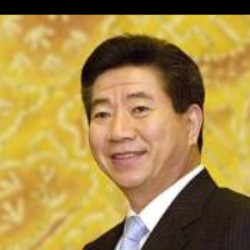

 Similar Images as below 


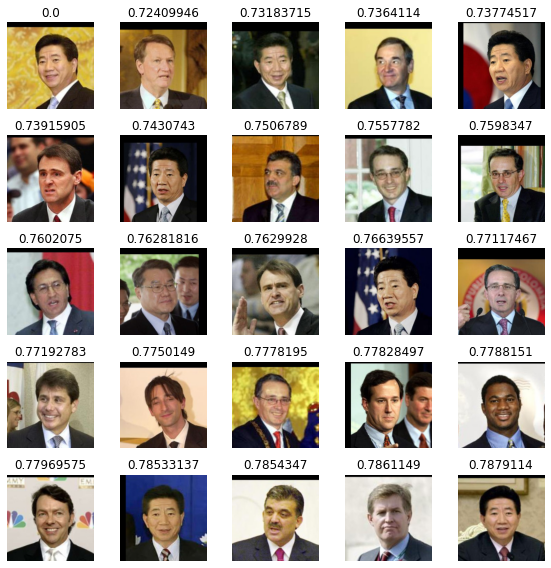

similarity images search done in  1.5560111999511719  seconds


In [10]:
import numpy as np
idx1=np.arange(0, len(imgspaths), 1)
FindNearestNeighbors(25,Allimagesfeatures,queryImgFE,idx1)

**Image search Engine model implementation using PCA( Principal component analysis):**

PCA (Dimensionality deduction) is algorithm used for dimensionality deduction
•	The pca object stores the actual transformation matrix of all imagesfeatures which was fit in the pca object. We can now use it to transform any original feature vector (of length 4096 colums) into a reduced 700-dimensional feature vector

•	The assumption we can now make is that two images which have similar content, should produce similar feature vectors. we use same query image and compute a measurement of the dissimilarity (or distance) of that image's PCA feature vector to every other image's feature vector. The dissimilarity metric we use is cosine distance.

•	The list similar_idx contains the image's similarity to every other one. We can sort that list and find the indexes of the most similar images. The next cell will sort them, and then find the most similar items, and return the indexes 25 most similar images. Notice we take from indexes 1:26 rather than 0:25 because the most similar image to the query image, will trivially be the query image itself, since it is included in the distance calculation


Before reducing dimensions - size is (1508, 4096)
After reducing dimensions - size is (1508, 400)
Roh_Moo-hyun


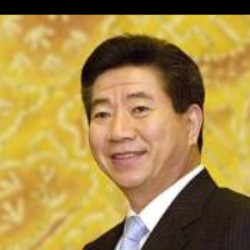

 Similar Images 


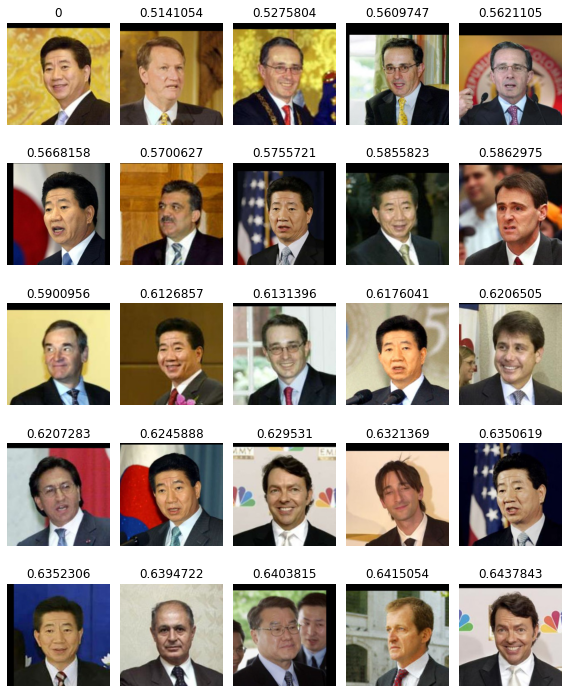

similarity images search using PCA in 3.708052158355713  seconds


In [11]:
from sklearn.decomposition import PCA
from scipy.spatial import distance
starttime=time.time()
pca = PCA(n_components=400)
pca.fit(Allimagesfeatures)
print("Before reducing dimensions - size is",Allimagesfeatures.shape)
pca_Allfeatures = pca.transform(Allimagesfeatures)
print("After reducing dimensions - size is",pca_Allfeatures.shape)

# find distance between query image and all other images
similar_idx = [ distance.cosine(pca_Allfeatures[query_image_idx], feat) for feat in pca_Allfeatures]
print(imglabels[query_image_idx])
display(img1)
#idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]
# Extract 25 images that have lowest distance
ids2 = np.argsort(similar_idx)[0:25]
#print(ids2)
scores = [(similar_idx[id],imgspaths[id]) for id in ids2]
axes=[]
fig=plt.figure(figsize=(8,10))
print(" Similar Images \n ==============================")
for j in range(len(scores)):
  score = scores[j]
  axes.append(fig.add_subplot(5, 5, j+1))
  subplot_title=round(score[0],7)
  axes[-1].set_title(subplot_title)  
  plt.axis('off')
  plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()
endtime=time.time()
print("similarity images search using PCA in",(endtime-starttime)," seconds")

**	Image search Engine model implementation using FaceNet,MTCNN and Keras:**

•	To improve image search engine baseline model, we used FaceNet,MTCNN and sklearn nearest neighbors algorithm.

•	FaceNet is a face recognition system developed in 2015 by researchers at Google that achieved then state-of-the-art results on a range of face recognition benchmark datasets. opensource implementations of the model and pretrained modes are available.

•	The FaceNet system can be used to extract high-quality features from faces, called face embeddings, that can then be used to train a face identification system. This model takes RGB images of 160×160 and generates an embedding of size 128 for an image.
 

•	Multi-task Cascaded Convolutional Networks (MTCNN) is a framework developed as a solution for both face detection and face alignment. The process consists of three stages of convolutional networks that are able to recognize faces and landmark location such as eyes, nose, and mouth.

•	NearestNeighbors algorithm to find nearest neighbors (images) 


	Below are implementation steps of image search engine using Facenet,MTCNN and KNN:

•	Upload image dataset 

•	Detect all faces from all images using MTCNN.

•	Load query image (we select image randomly)


•	Detect all faces from query image

•	Load Facenet pretrained model

•	Extract features from all faces of dataset images using Facenet

•	Extract features from all faces of query image

•	Calculate the similarities of query image with all images using KNN 

algorithm. This algorithm calculates distances (Euclidean Distance) between query image features with all images features

•	Retrieve the most similar result:  we get k images that has smaller distances to query image to get similar images



**	Below are implementation steps of image search engine using python code:**

•	Please install mtcnn and verify installation by getting version number
Commands:
Pip install mtcnn
Import mtcnn
Print(mtcnn.__version__)


In [12]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [13]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


**•	Below is the code to extract faces from a image using MTCNN**

In [14]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
# extract a single face from a given photograph
def extract_Imgfaces(filename, label,idx,required_size=(160, 160),data_type = 'train'):
  subimgs_array =list()
  imgfacelabels=list()
  imgfaceindex=list()
  # load image from file
  image = Image.open(filename)
  # convert to RGB, if needed
  image = image.convert('RGB')
	# convert to array
  pixels = asarray(image)
	# create the detector, using default weights
  detector = MTCNN()
	# detect faces in the image
  results = detector.detect_faces(pixels)
  #print(idx," ","results=",len(results) )
  # extract the bounding box from all the faces
  for res in range(len(results)):
      x1, y1, width, height = results[res]['box']
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + width, y1 + height
	    # extract the face
      face = pixels[y1:y2, x1:x2]
      # resize pixels to the model size
      image = Image.fromarray(face)
      image = image.resize(required_size)
      subimg = asarray(image)
      #print(type(subimg))
      subimgs_array.append(subimg)
      imgfacelabels.append(label)
      imgfaceindex.append(idx)
  if data_type == 'train':
    return subimgs_array,imgfacelabels,imgfaceindex
  else:
    return subimg,imgfacelabels,idx

**•	Below is the code to extract faces from all images using MTCNN. It took more than 30 minutes from 1508 images**

Note: the code is written to extract all faces from image


In [15]:
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
def ExtractAllImgsFaces():
  AllImgsfaces=list()
  AllImgslabels=list()
  AllImgsidx=list()
  #testpath=['/content/sample_data/lfw/AJ_Cook/AJ_Cook_0001.jpg','/content/sample_data/lfw/AJ_Cook/Ainsworth_Dyer/Ainsworth_Dyer_0001.jpg']
  for i in range(len(imgspaths)):
    subimgs,labels,idxlist= extract_Imgfaces(imgspaths[i],imglabels[i],i)
    #print(type(subimgs))
    AllImgsfaces.extend(subimgs)
    AllImgslabels.extend(labels)
    AllImgsidx.extend(idxlist)
    #print(imgspaths[i])
  return asarray(AllImgsfaces),asarray(AllImgslabels),asarray(AllImgsidx)

startttime=time.time()
trainimages,trainlabels,tranidx=ExtractAllImgsFaces()
endtime=time.time()
print("Faces extraction from images is done in",(endtime-starttime)," seconds")

print(trainimages.shape)
print(trainlabels.shape)
print(tranidx)


Faces extraction from images is done in 2180.90252828598  seconds
(1798, 160, 160, 3)
(1798,)
[   0    1    2 ... 1505 1506 1507]


**Below is the code to extract faces from query images using MTCNN. We save extracted faces array and respective images labels at npz file. It is just avoid faces detection again and again**

In [16]:
from numpy import savez_compressed
print(trainimages.shape)
print(trainlabels.shape)
testimgs,testlabels,testidx = extract_Imgfaces(imgspaths[query_image_idx],imglabels[query_image_idx],query_image_idx,data_type = 'test')
#print(type(testimgs))
testimgfaces=asarray(testimgs)
testlabels=asarray(testlabels)
print(testimgs.shape)
print(testlabels.shape)
# save arrays to one file in compressed format
savez_compressed('/content/sample_data/faces-dataset.npz', trainimages, trainlabels, testimgs, testlabels)

(1798, 160, 160, 3)
(1798,)
(160, 160, 3)
(1,)


**•	Below is the code to Load Facenet pretrained model**

In [17]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('/content/sample_data/facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


**•	Below is the code extract features from a face image of full image dataset. It took more than 30 minutes.**
The features will be 128 array 
Faces array with dimension is 160,160,3 for each face 


In [18]:
def ExtractImg_feature_facenet(model, img):
    # scale pixel values
    img = img.astype('float32')
    # standardization
    mean, std = img.mean(), img.std()
    img = (img-mean)/std
    
    # transform image into multidimentional
    imgsample = np.expand_dims(img, axis=0)
    # make prediction to get embedding
    #print("img",imgsample.shape)
    feature = model.predict(imgsample)[0]
    return feature

**•	Below is the code save to extracted features,labels of all faces of dataset and query image faces features,labels in npz file  for future use.**

In [19]:
from numpy import load
# load the face dataset
imgfaces = load('/content/sample_data/faces-dataset.npz',allow_pickle=True)
trainimagesface, traininglabel, testimgsface,testlabelslabel = imgfaces['arr_0'], imgfaces['arr_1'], imgfaces['arr_2'], imgfaces['arr_3']
print('Loaded: ', trainimagesface.shape, traininglabel.shape, testimgsface.shape, testlabelslabel.shape)



Loaded:  (1798, 160, 160, 3) (1798,) (160, 160, 3) (1,)


In [20]:
Allimgfeatfacenet=[]
for i in range(len(trainimagesface)):
  #print(trainimagesfeat[i].shape)
  embedding = ExtractImg_feature_facenet(model, trainimagesface[i])
  Allimgfeatfacenet.append(embedding)
Allimgfeatfacenet = asarray(Allimgfeatfacenet)
#print(Allimgfeatfacenet.shape)
endtime=time.time()
print("Features extraction using facenet done in",(endtime-starttime)," seconds")

Features extraction using facenet done in 2460.020837545395  seconds


In [21]:
queryImgfeatures=ExtractImg_feature_facenet(model, testimgsface)
#queryImgfeatures=np.expand_dims(queryImgfeatures, axis=0)
print(queryImgfeatures.shape)
print((np.expand_dims(queryImgfeatures, axis=0)).shape)
savez_compressed('/content/sample_data/faces-dataset_embeddings.npz', Allimgfeatfacenet, trainlabels, queryImgfeatures, testlabels)

(128,)
(1, 128)


**•	We find distance between features(extracted using facenet) to  find similar images using nearest neighbors algorithm. It took 1.3 seconds**

In [22]:
tranidx

array([   0,    1,    2, ..., 1505, 1506, 1507])

Roh_Moo-hyun


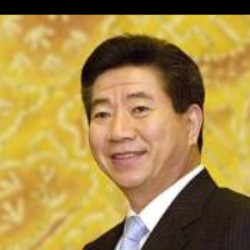

 Similar Images as below 


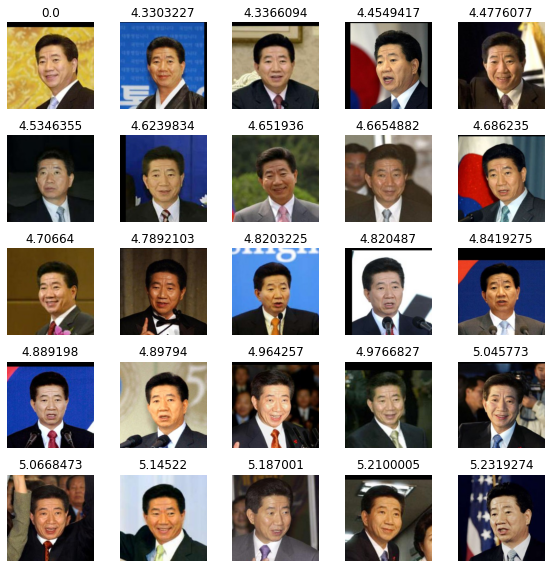

similarity images search done in  1.5403153896331787  seconds


In [23]:
if len(Allimgfeatfacenet)>0 and len(queryImgfeatures)>0:
  FindNearestNeighbors(25,Allimgfeatfacenet,queryImgfeatures,tranidx)

